In [1]:
import sys
sys.path.append('./../')

%config InlineBackend.figure_format = 'retina'


In [2]:
from sklearn.neighbors.kde import KernelDensity
from ptc_model import two_cycle
from util import density
from example import get_stair
from sklearn.neighbors.kde import KernelDensity
from Esme.helper.format import precision_format as pf

from ptc_model import two_cycle
from I_x.I_x_slice import I_x_slice_
from util import viz_stair_, get_epsilon
from viz import viz_pd

import time
import sys
from joblib import Parallel, delayed
from argparse import ArgumentDefaultsHelpFormatter, ArgumentParser


In [3]:
n = 50 # number of points for each cycle and no

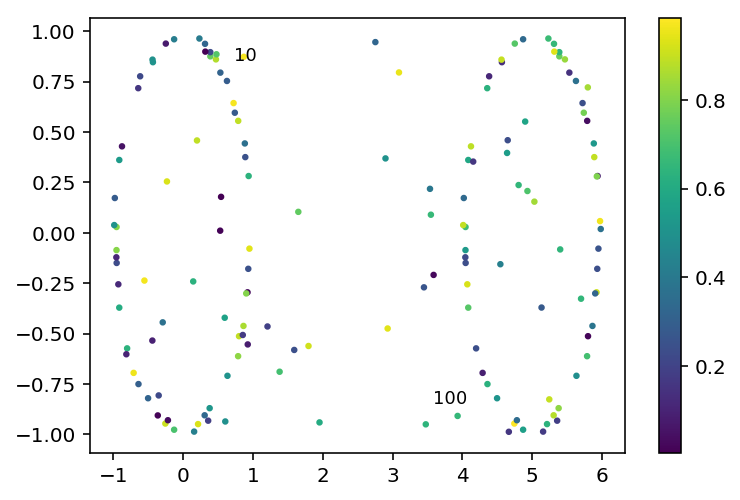

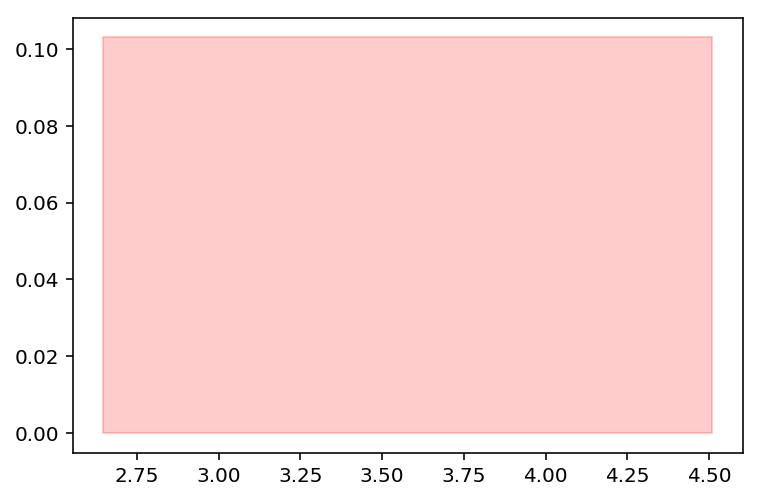

In [4]:
start_t = time.time()
show_flag = True
save_flag = False

# specify toy models
points, distm = two_cycle(n)
if show_flag: viz_pd(points, show=True, color=None, annotate=[10, 100])

f = - density(points).reshape(len(points),1)

for idx in [10]:
    stair = get_stair(f, distm, idx=idx, method='heu')

    # viz
    end_t = time.time()
    title = f'I_x for {idx} with co-density {pf(f[idx][0], 2)}. Comp.T: {pf(end_t - start_t, 1)}'
    viz_stair_(stair, show=True, color='r', alpha=.2)

#     viz_stair(stair, show=show_flag, title=title, save=save_flag, dir='./img/', f=f'{idx}.png')


In [5]:
import copy
import os
import pickle
import sys
from time import time
from sys import getsizeof
sys.path.append('../I_x/')
import networkx as nx
import numpy as np
from joblib import delayed, Parallel
from profilehooks import profile

from I_x.I_x_slice import set_graph
from I_x.mst_test import get_ultra_matrix
from helper.time import precision_format as pf
from helper.time import timefunction
from I_x.dgm2d import *
TOR = 1e-6
np.random.random(42)


array([0.04600264, 0.0407288 , 0.85546058, 0.70365786, 0.47417383,
       0.09783416, 0.49161588, 0.47347177, 0.17320187, 0.43385165,
       0.39850473, 0.6158501 , 0.63509365, 0.04530401, 0.37461261,
       0.62585992, 0.50313626, 0.85648984, 0.65869363, 0.16293443,
       0.07056875, 0.64241928, 0.02651131, 0.58577558, 0.94023024,
       0.57547418, 0.38816993, 0.64328822, 0.45825289, 0.54561679,
       0.94146481, 0.38610264, 0.96119056, 0.90535064, 0.19579113,
       0.0693613 , 0.100778  , 0.01822183, 0.09444296, 0.68300677,
       0.07118865, 0.31897563])

In [6]:
    set_dir()
    sys.argv = []
    parser = ArgumentParser("scoring", formatter_class=ArgumentDefaultsHelpFormatter, conflict_handler='resolve')
    args = parser.parse_args()
    args.n = 100
    args.re = True
    args.n_jobs = -1
    args.verbose = 0
    
    n = args.n # 2000

    f = np.random.random((n, 1))
    f[10] = 0.1
    distm = np.random.random((n, n))
    distm = distm + distm.T
    
    global sigmas
    sigmas = f.reshape(n,).tolist()
    sigmas.sort()

    f_sort = copy.deepcopy(f).reshape((n,)).tolist() # # f_sort is a global variable
    f_sort.sort()
    idx_sort = get_idxsort(f, f_sort)

    G = set_graph(f.shape[0], f, distm)
    G = get_subgraph(f, 0, distm)

    subgraphs = {0: G}
    subgraphs_ = {}
    if args.re:
        for i in range(len(sigmas)-1): # sigmas = np.linspace(0, 1, 10)
            t0 = time()
            G  = update_subgraph(G, f, distm, sigmas[i], sigmas[i+1])
            from pathlib import Path
            home = str(Path.home())
            file = os.path.join(home, 'Documents', 'DeepLearning', 'Clustering', 'subgraphs', str(i+1) + '.pkl')
            with open(file, 'wb') as handle:
                pickle.dump(G, handle, protocol=pickle.HIGHEST_PROTOCOL)

            t1 = time()
            G_ = get_subgraph(f, sigmas[1], distm) # get_subgraph(f, sigmas[i+1], distm)
            t2 = time()
            if args.verbose>1:
                print(f'G/G_ is {len(G.edges())}/{len(G_.edges())} ')
                print(f'{i} iter: update/get_subgraph takes {pf(t1-t0, 3)}/{pf(t2-t1, 3)}. ', end=' ')
            subgraphs_[sigmas[i+1]] = G_

            t3 = time()
            subgraphs[sigmas[i + 1]] = G
            t4 = time()
            if args.verbose>1:
                print(f'pickle {pf(t4 - t3, 3)} ', end=' ')

        print(f'len of sigmas is {len(sigmas)}')
        print(f'len of subgraphs/_ is {len(subgraphs)}/{len(subgraphs_)}.')
        
        if args.verbose > 1:
            for k in subgraphs_.keys():
                print(f'sigma is {pf(k,2)} and num of edges is {len(subgraphs[k].edges())}/{len(subgraphs_[k].edges())}.')
    
    dgm = []
    for sigma in sigmas[1:]:
        dgm_slice = D_x_slice_clean(f, f_sort, idx_sort, sigma, sigmas) # [{key: (sigma, epsilon)}, ...]
        dgm.append(dgm_slice)
    
#     stairs = Parallel(n_jobs=args.n_jobs, backend='multiprocessing')(delayed(D_x_slice)(f, f_sort, idx_sort, sigma, print_=False) for sigma in sigmas[1:])



len of sigmas is 100
len of subgraphs/_ is 100/99.
...................................................................................................

In [7]:
from util import viz_stairs_
stairs = {}
for s in dgm:
    for x, (sig, eps) in s.items():
        if x not in stairs.keys(): stairs[x] = []
        stairs[x].append((sig, eps))

In [8]:
res = []
for k, v in stairs.items():
    for (sig, ep) in v:
        if ep == 1e5:
            break
    res.append(v)
# print(res)

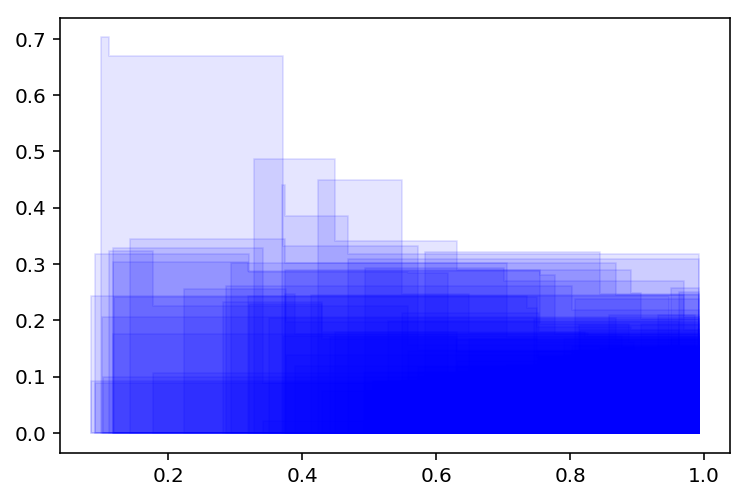

In [9]:
viz_stairs_(res[10:100], alpha=[.1]*90)

In [10]:

print(home)

/home/cai.507
